## BBM 409 - Programming Assignment 1

* You can add as many cells as you want in-between each question.
* Please add comments to your code to explain your work.  
* Please add Markdown cells to answer the (non-coding) questions in the homework text. You can, however, refer to the outputs of code cells without adding them as images to the Markdown cell unless you are requested to do otherwise.
* Please be careful about the order of runs of cells. Doing the homework, it is likely that you will be running the cells in different orders, however, they will be evaluated in the order they appear. Hence, please try running the cells in this order before submission to make sure they work.    
* Please refer to the homework text for any implementation detail. Though you are somewhat expected to abide by the comments in the below cells, they are mainly just provided for guidance. That is, as long as you are not completely off this structure and your work pattern is understandable and traceable, it is fine. For instance, you do not have to implement a particular function within a cell just because the comment directs you to do so.
* This document is also your report. Show your work.

# Cansu ASLAN - 2210356079

## Understanding Perceptron Learning Algorithm (100 points +5 points)

### 1. Data Loading and Exploration (5 points)
* Brief overview of the task.

In this assignment, we implement the Perceptron Learning Algorithm from scratch to classify banknotes as real or fake using four features. We assess performance with accuracy, precision, recall, and F1 score, and visualize the decision boundary in 2D. Finally, we compare the Perceptron’s 2D separation with a 1D projection using Fisher’s Linear Discriminant to understand class separation.







* Description of the dataset used for analysis.

The analysis utilizes the Banknote Authentication Dataset, comprising 1,372 samples characterized by four features: variance, skewness, kurtosis, and entropy. These features are derived from banknote images, and the target variable indicates authenticity, with class 1 representing authentic banknotes and class 0 for counterfeit ones. This dataset is ideal for applying the Perceptron Learning Algorithm to effectively distinguish between the two classes. Preprocessing steps, such as normalization, may be applied to enhance model performance.

In [35]:
## Import necessary libraries
!pip install ucimlrepo
import pandas as pd
import numpy as np
from ucimlrepo import fetch_ucirepo
from sklearn.preprocessing import StandardScaler
from numpy import set_printoptions
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

In [36]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
banknote_authentication = fetch_ucirepo(id=267)

# data (as pandas dataframes)
# Features and target variables
X = banknote_authentication.data.features
y = banknote_authentication.data.targets

# metadata
print(banknote_authentication.metadata)

# variable information
print(banknote_authentication.variables)

{'uci_id': 267, 'name': 'Banknote Authentication', 'repository_url': 'https://archive.ics.uci.edu/dataset/267/banknote+authentication', 'data_url': 'https://archive.ics.uci.edu/static/public/267/data.csv', 'abstract': 'Data were extracted from images that were taken for the evaluation of an authentication procedure for banknotes.', 'area': 'Computer Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 1372, 'num_features': 4, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2012, 'last_updated': 'Fri Feb 16 2024', 'dataset_doi': '10.24432/C55P57', 'creators': ['Volker Lohweg'], 'intro_paper': None, 'additional_info': {'summary': 'Data were extracted from images that were taken from genuine and forged banknote-like specimens.  For digitization, an industrial camera usually used for print inspection was used. The final im

In [37]:
## Read the regression data and transform it into a Numpy array collection.
## (See pandas and numpy functions)
# Fetch the dataset URL from metadata
data_url = banknote_authentication.metadata['data_url']

# Load the dataset into a pandas DataFrame
data = pd.read_csv(data_url)

# Display the first few rows of the dataset for inspection
print("First 5 rows of the dataset:")
print(data.head())

# Separate features and target variable
features = data.iloc[:, :-1]  # Features: all columns except the last one
target = data.iloc[:, -1]     # Target: the last column

# Convert features and target to NumPy arrays
X_array = features.to_numpy()
y_array = target.to_numpy()

# Display the converted arrays
print("\nFeatures (X) as a Numpy array:\n", X_array)
print("\nTarget (y) as a Numpy array:\n", y_array)

print("Features (X) as Numpy array:\n", X, "\n")
print("Target (y) as Numpy array:\n", y)

First 5 rows of the dataset:
   variance  skewness  curtosis  entropy  class
0   3.62160    8.6661   -2.8073 -0.44699      0
1   4.54590    8.1674   -2.4586 -1.46210      0
2   3.86600   -2.6383    1.9242  0.10645      0
3   3.45660    9.5228   -4.0112 -3.59440      0
4   0.32924   -4.4552    4.5718 -0.98880      0

Features (X) as a Numpy array:
 [[  3.622   8.666  -2.807  -0.447]
 [  4.546   8.167  -2.459  -1.462]
 [  3.866  -2.638   1.924   0.106]
 ...
 [ -3.75  -13.459  17.593  -2.777]
 [ -3.564  -8.383  12.393  -1.282]
 [ -2.542  -0.658   2.684   1.195]]

Target (y) as a Numpy array:
 [0 0 0 ... 1 1 1]
Features (X) as Numpy array:
       variance  skewness  curtosis  entropy
0      3.62160   8.66610   -2.8073 -0.44699
1      4.54590   8.16740   -2.4586 -1.46210
2      3.86600  -2.63830    1.9242  0.10645
3      3.45660   9.52280   -4.0112 -3.59440
4      0.32924  -4.45520    4.5718 -0.98880
...        ...       ...       ...      ...
1367   0.40614   1.34920   -1.4501 -0.55949
136

In [38]:
## Explore the dataset (e.g., size, features, target variables, summary statistics).
## Check for any missing values and handle them if necessary.

# Display dataset size
print("Dataset Size:")
print("Number of samples:", X.shape[0])
print("Number of features:", X.shape[1])


# Display feature names and target variable
print("\nFeatures:", X.columns.tolist())
print("Target Variable:", y.columns[0])

# Summary statistics
print("\nSummary statistics:")
print(X.describe())

# target
print(y.describe())

# Check for missing values
if X.isnull().sum().any() or y.isnull().sum().any() > 0:
    # Option 1: Fill missing values (e.g., with mean)
    X_filled = X.fillna(X.mean())
    y_filled = y.fillna(y.mean())

    # Option 2: Drop rows with missing values
    X_dropped = X.dropna()
    y_dropped = y[X_dropped.index]  # Align target variable with filtered features

    print("\nMissing values have been handled.")
else:
    print("\nNo missing values detected.")


Dataset Size:
Number of samples: 1372
Number of features: 4

Features: ['variance', 'skewness', 'curtosis', 'entropy']
Target Variable: class

Summary statistics:
          variance     skewness     curtosis      entropy
count  1372.000000  1372.000000  1372.000000  1372.000000
mean      0.433735     1.922353     1.397627    -1.191657
std       2.842763     5.869047     4.310030     2.101013
min      -7.042100   -13.773100    -5.286100    -8.548200
25%      -1.773000    -1.708200    -1.574975    -2.413450
50%       0.496180     2.319650     0.616630    -0.586650
75%       2.821475     6.814625     3.179250     0.394810
max       6.824800    12.951600    17.927400     2.449500
             class
count  1372.000000
mean      0.444606
std       0.497103
min       0.000000
25%       0.000000
50%       0.000000
75%       1.000000
max       1.000000

No missing values detected.


In [39]:
# Convert the DataFrame to a Numpy array
X_array = X.to_numpy()  # Convert the DataFrame of features to a Numpy array
y_array = y.to_numpy()  # Convert the DataFrame or Series of target to a Numpy array
y_array = y_array.ravel()

print("Target array (X):", X_array)
print("Target array (y):", y_array)

Target array (X): [[  3.622   8.666  -2.807  -0.447]
 [  4.546   8.167  -2.459  -1.462]
 [  3.866  -2.638   1.924   0.106]
 ...
 [ -3.75  -13.459  17.593  -2.777]
 [ -3.564  -8.383  12.393  -1.282]
 [ -2.542  -0.658   2.684   1.195]]
Target array (y): [0 0 0 ... 1 1 1]


### 2. Data Preprocessing (5 points)
Explain the preprocessing steps taken and their rationale.

In the preprocessing steps for the Banknote Authentication Dataset, the first task was to analyze the dataset to determine whether feature scaling was necessary. Given that the features—variance, skewness, kurtosis, and entropy—may have different scales, it was decided to standardize the features using the StandardScaler. This scaling transforms the data to have a mean of zero and a standard deviation of one, which helps improve the convergence speed and performance of the Perceptron Learning Algorithm.

After scaling, the dataset was split into training and testing sets, with 80% of the data allocated for training and 20% for testing. This division is crucial for evaluating the model's generalization capability on unseen data. Finally, the shapes of the resulting training and testing sets were printed to confirm the correct split, ensuring the model is trained and evaluated on appropriately sized datasets.








#### Feature Scaling Techniques:
Feature scaling is important for many machine learning algorithms, especially those based on distance metrics (e.g., k-nearest neighbors, support vector machines) and gradient descent optimization (e.g., linear regression, logistic regression).

Some common feature scaling techniques include:

1. **Standardization (Z-score normalization):** It scales the features to have a mean of 0 and a standard deviation of 1.
2. **Min-Max Scaling:** It scales the features to a fixed range, typically between 0 and 1.
3. **Robust Scaling:** It scales the features based on percentiles, making it robust to outliers.

You can use these scaled features for training your machine learning models.

Remember, the choice of feature selection and feature scaling techniques can significantly impact the performance of your models. It's essential to experiment and choose the techniques that work best for your specific dataset and machine learning tasks.

In [40]:
## Analyze the dataset and decide whether scaling is needed.
## Explain your choices in a brief comment.

# Scaling is necessary as the features have different ranges, which can bias the Perceptron's learning.
# StandardScaler standardizes the features to have a mean of zero and a standard deviation of one,
# ensuring equal contribution during training and improving convergence speed.

scaler = StandardScaler().fit(X_array)
rescaledX = scaler.transform(X_array)
set_printoptions(precision=3)
print(rescaledX[0:5,:])

[[ 1.122  1.149 -0.976  0.355]
 [ 1.447  1.064 -0.895 -0.129]
 [ 1.208 -0.777  0.122  0.618]
 [ 1.064  1.295 -1.255 -1.144]
 [-0.037 -1.087  0.737  0.097]]


#### Training and Validation Split
1. Explain why it’s important to use the validation set to evaluate your model instead
of relying solely on the training data.


  Using a validation set is essential to evaluate a model because it provides an independent assessment of the model's ability to generalize to unseen data. Relying solely on training data can lead to overfitting, where the model performs well on training data but poorly on new data. The validation set helps measure true performance, aids in model selection, and ensures that hyperparameters are tuned for better generalization, ultimately leading to a more robust model.


2. Discuss how evaluating the model on unseen
data helps in assessing its generalization capability.

  Evaluating a model on unseen data is crucial for assessing its generalization capability because it simulates real-world scenarios where the model encounters new inputs. By testing the model on data it hasn't seen during training, we can gauge its ability to make accurate predictions outside the training set. This evaluation reveals how well the model captures the underlying patterns in the data, rather than just memorizing the training examples. If a model performs well on unseen data, it indicates that it has learned to generalize effectively, making it more reliable for practical applications.

In [41]:
# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(rescaledX, y_array, test_size=0.2, random_state=7)

# Print the shapes of the resulting sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of Y_train:", y_train.shape)
print("Shape of Y_test:", y_test.shape)

Shape of X_train: (1097, 4)
Shape of X_test: (275, 4)
Shape of Y_train: (1097,)
Shape of Y_test: (275,)


### 3. Implementing Perceptron for Binary Classification (20 points)

Explain the reason behind the application of perceptron learning algorithm on this type of data.


The Perceptron Learning Algorithm is suitable for the Banknote Authentication Dataset as it efficiently handles binary classification tasks. The dataset's features—variance, skewness, kurtosis, and entropy—can often be linearly separated, allowing the Perceptron to find a hyperplane that distinguishes between authentic and fake banknotes. Its simplicity enables quick implementation and provides initial insights into the classification problem.

In [42]:
## Implement Percepton Learning Algorithm
## Implement Percepton Learning Algorithm
class Perceptron:
    def __init__(self, learning_rate=0.01, n_iter=1000):
        self.learning_rate = learning_rate
        self.n_iter = n_iter
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        # Initialize weights and bias
        y = np.where(y <= 0, 0, 1)


        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        # Training loop
        for _ in range(self.n_iter):
            for idx, x_i in enumerate(X):
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_predicted = self.activation_function(linear_output)

                # Perceptron update rule
                update = self.learning_rate * (y[idx] - y_predicted)
                self.weights += update * x_i
                self.bias += update

    def activation_function(self, x):
        # Step function
        return np.where(x >= 0, 1, 0)

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        y_predicted = self.activation_function(linear_output)
        return y_predicted


Discuss how the choice of learning rate and the number of epochs might affect the
training process. What happens with a very small or very large learning rate?

  The learning rate and number of epochs are crucial for training the Perceptron. A small learning rate can slow down convergence and lead to inadequate learning, while a large learning rate may cause the model to overshoot optimal weights and diverge.

  Similarly, too few epochs can result in underfitting, while too many can lead to overfitting. Balancing these factors is essential for effective training and achieving good model performance.

In [43]:
# Accuracy implementation
def accuracy(y_true, y_pred):
    # Count the number of correct predictions
    correct_predictions = np.sum(y_true == y_pred)

    # Calculate accuracy as the ratio of correct predictions to total predictions
    accuracy = correct_predictions / len(y_true)

    # Return accuracy as a percentage
    return accuracy

#### Train the Perceptron

In [44]:
## Train the Perceptron model on the training set.
perceptron = Perceptron(learning_rate=0.01, n_iter=1000)
perceptron.fit(X_train, y_train)


#### Prediction on Training Data

In [45]:
# Predicting on the training data
y_pred_train = perceptron.predict(X_test)
accuracy_train = accuracy(y_test, y_pred_train)
print("Training Accuracy:", accuracy_train)

Training Accuracy: 0.9854545454545455


### 4. Evaluating Perceptron for Binary Classification (25 points)

#### Prediction on Validation Data

In [46]:
## Evaluate the model's performance on the test set by calculating accuracy.
y_pred_test = perceptron.predict(X_test)
accuracy_test = accuracy(y_test, y_pred_test)

print("Testing Accuracy:", accuracy_test)

Testing Accuracy: 0.9854545454545455


Answer the Guiding Questions:
1. What does accuracy tell us about the performance of the model?

  Accuracy measures the proportion of correctly classified instances among the total predictions made by the model. An accuracy of approximately 98.55% indicates that the model performs exceptionally well on the test dataset, correctly identifying most of the banknotes as either authentic or fake. However, while high accuracy suggests good overall performance, it may not fully capture the model's effectiveness, especially in scenarios with class imbalances. Therefore, it should be complemented with other metrics for a comprehensive evaluation.

2. Why is accuracy sometimes not enough, especially in cases where the data is imbal-
anced? Explain a scenario where a high accuracy might be misleading.


  Accuracy can be misleading in cases of imbalanced datasets, where one class significantly outnumbers the other. For instance, consider a binary classification problem where 95% of the samples are of class A (authentic banknotes) and only 5% are class B (fake banknotes). A model could achieve 95% accuracy simply by predicting all instances as class A. However, it would fail to identify any fake banknotes, resulting in poor performance despite high accuracy. Therefore, relying solely on accuracy in such scenarios can obscure the model's true effectiveness, necessitating the use of additional metrics like precision, recall, and F1 score for a more accurate assessment.

In [47]:
def calculate_metrics(y_true, y_pred):


    # Calculate True Positives, False Positives, True Negatives, False Negatives
    tp = np.sum((y_pred == 1) & (y_true == 1))  # True Positives
    tn = np.sum((y_pred == 0) & (y_true == 0))  # True Negatives
    fp = np.sum((y_pred == 1) & (y_true == 0))  # False Positives
    fn = np.sum((y_pred == 0) & (y_true == 1))  # False Negatives

    # Calculate accuracy
    accuracy = (tp + tn) / len(y_true)   # Convert to percentage

    # Calculate precision
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0

    # Calculate recall
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0

    # Calculate F1 Score
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0


    return accuracy, precision, recall, f1

# Calculate and print metrics
y_pred_train = perceptron.predict(X_train)  # Generate predictions for training data

accuracy_train, precision_train, recall_train, f1_train = calculate_metrics(y_train.flatten(), y_pred_train)

print(f"Training Accuracy: {accuracy_train}")
print(f"Training Precision: {precision_train}")
print(f"Training Recall: {recall_train}")
print(f"Training F1 Score: {f1_train}")

Training Accuracy: 0.9936189608021878
Training Precision: 0.9959183673469387
Training Recall: 0.9898580121703854
Training F1 Score: 0.9928789420142421


Answer the Guiding Questions:
1. In what types of problems is precision more important than recall? Give an example
scenario where high precision is desirable but low recall might be acceptable.

  Precision is more important than recall in situations where false positives carry significant consequences. For example, in medical diagnostics for a rare but serious disease, high precision ensures that most patients identified as positive truly have the disease, avoiding unnecessary stress and invasive procedures for healthy individuals. Low recall may be acceptable, as missing some actual cases is less harmful than incorrectly diagnosing healthy patients.

2. In what cases is recall more critical? Discuss an example where missing true positives
is more harmful than having false positives.

  Recall is critical in scenarios where failing to identify true positives can lead to severe consequences. For example, in cancer screening, a high recall is essential to ensure that most cases of the disease are detected. Missing a cancer diagnosis can result in delayed treatment, worsening patient outcomes, or even death. In this case, a few false positives, which may lead to additional testing or anxiety, are less harmful than failing to catch a potentially life-threatening condition.

3. When is the F1 score a better measure than accuracy? Explain why balancing
precision and recall is important in some contexts.

  The F1 score is preferred over accuracy in imbalanced datasets, where high accuracy can be misleading if the model mostly predicts the majority class. It balances precision and recall, making it crucial in contexts like fraud detection or medical diagnosis, where both false positives and false negatives have significant consequences. Balancing these metrics ensures that the model effectively identifies important cases across both classes.

4. What are the limitations of using F1 score alone?

  The F1 score has limitations, as it doesn't account for true negatives and may obscure low performance in precision and recall. It is also sensitive to classification thresholds, making it important to use alongside other metrics for a complete evaluation of model performance.

### 5. Visualization of the Hyperplane (40 + 5 points)

In this section, you will explore how the Perceptron Learning Algorithm forms the de-
cision boundary (or hyperplane) that separates the two classes. To be able to do that
you will reduce the feature space to two dimensions, train the Perceptron on the selected
features, and visualize the hyperplane. The goal is to understand how the Perceptron
changes the decision boundary as the data changes, and how it adapts based on the
features used.

#### Step 1: Feature Selection Using Correlation Analysis (10 points)

1. Correlation Analysis: One effective way to reduce the number of features is by
analyzing the correlation between them. Highly correlated features may provide re-
dundant information, so you can select two less correlated features for visualization.
2. Compute the correlation matrix: Analyze the relationship between the four features
(variance, skewness, kurtosis, and entropy) to identify pairs of features with low
correlation.

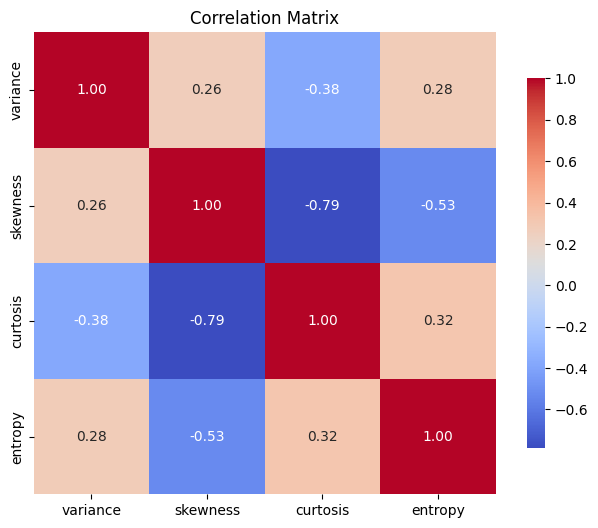

In [48]:
# Compute the correlation matrix
correlation_matrix = X.corr()

# Display the correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title("Correlation Matrix")
plt.show()

3. Choose two features: Based on the correlation analysis, select two features that are
least correlated (e.g., variance and skewness) to visualize the Perceptron’s decision
boundary.

In [49]:
# Select two features
# Select these features from the original feature set
feature1 = 'skewness'
feature2 = 'curtosis'
selected_features = X[[feature1, feature2]]  # Two least correlated features for example



# Split the selected features into training and validation sets if not done yet7
X_train_selected, X_test_selected, y_train_selected, y_test_selected = train_test_split(
   selected_features , y_array, test_size=0.2, random_state=7
)

print("Shape of the selected training features:", X_train_selected.shape)
print("Shape of the selected testing features:", X_test_selected.shape)

Shape of the selected training features: (1097, 2)
Shape of the selected testing features: (275, 2)


#### Step 2: Train the Perceptron on Selected Features (10 points)

1. Retrain the Perceptron: After selecting two features, train the Perceptron using
only these two features. Use the same training and evaluation process as before,
but now the model will work in a two-dimensional feature space.

In [50]:
X_train_selected = np.array(X_train_selected, dtype=float)
y_train_selected = np.array(y_train_selected, dtype=int)
## Train the Perceptron model on the training set.
perceptron_selected = Perceptron(learning_rate=0.01, n_iter=1000)
perceptron_selected.fit(X_train_selected, y_train_selected)

# Predicting on the training data
y_pred_train_selected = perceptron_selected.predict(X_train_selected)
accuracy_train = accuracy(y_train_selected, y_pred_train_selected)

print("Training Accuracy:", accuracy_train)

Training Accuracy: 0.5706472196900638


2. Visualize the decision boundary (hyperplane): Once the Perceptron is trained, plot
the decision boundary (hyperplane) to see how the Perceptron separates the two
classes in 2D.

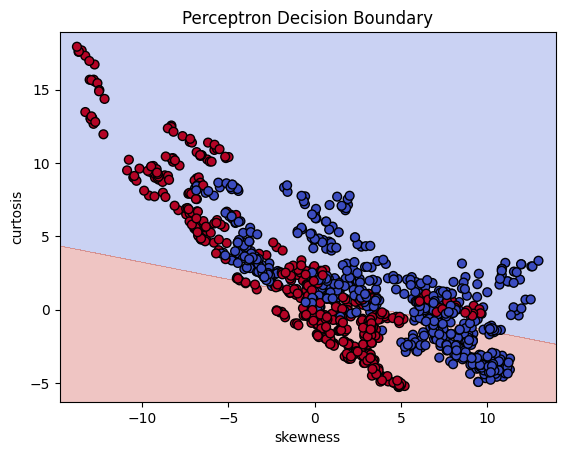

In [51]:
# Function to plot the decision boundary
def plot_decision_boundary(X, y, model):
      # Create a mesh grid to plot decision boundary
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    # Predict on the grid points to form the decision boundary
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the decision boundary
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')

    # Plot the data points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolor='k', s=40)
    plt.xlabel(selected_features.columns[0])
    plt.ylabel(selected_features.columns[1])
    plt.title("Perceptron Decision Boundary")
    plt.show()

# Plot the decision boundary using the selected features and trained model
plot_decision_boundary(X_train_selected, y_train_selected, perceptron_selected)

#### Step 3: Experiment with Different Features (10 points)

After visualizing the decision boundary for one pair of features, try selecting different
combinations of features (e.g., variance and entropy) and retrain the Perceptron. Compare
how the hyperplane changes with different features. This helps in understanding how the
Perceptron’s decision-making process adapts to different feature sets.

Answer the guiding
questions:
1. How does the decision boundary change when you use different pairs of features?
 When different pairs of features are used, the decision boundary of the Perceptron can shift significantly. Each pair of features captures distinct relationships in the data, leading to variations in how the classes are separated. For instance, one feature combination might create a clearer separation between classes, while another might result in overlapping regions, indicating poorer classification performance. This demonstrates how the choice of features directly influences the Perceptron's ability to distinguish between classes.
2. Can you find a pair of features that leads to better separation between the two
classes?
  Yes, through experimentation with different feature pairs, it is possible to identify combinations that result in improved separation between the classes. For example, selecting features like variance and entropy might provide a more pronounced decision boundary, enhancing the model's ability to differentiate between classes effectively. These optimal pairs can significantly improve the overall classification performance of the Perceptron.

Selected Features: ['variance', 'skewness']
Training Accuracy: 0.8003646308113036


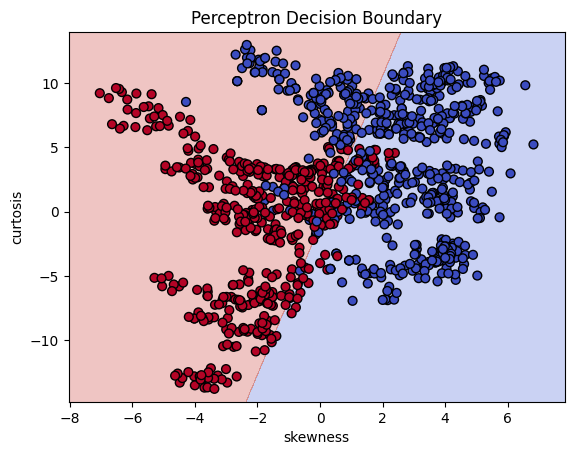

Selected Features: ['variance', 'curtosis']
Training Accuracy: 0.8505013673655424


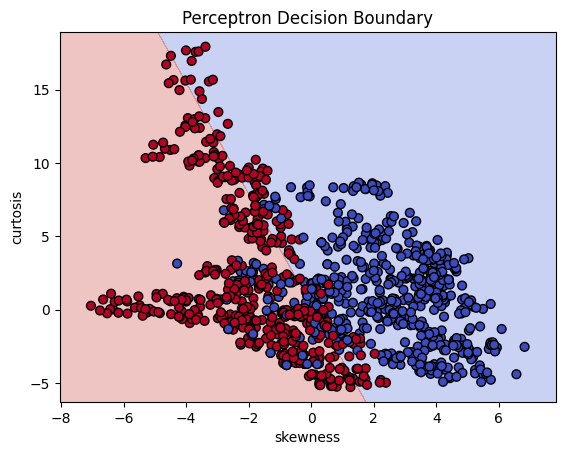

Selected Features: ['variance', 'entropy']
Training Accuracy: 0.8304466727438469


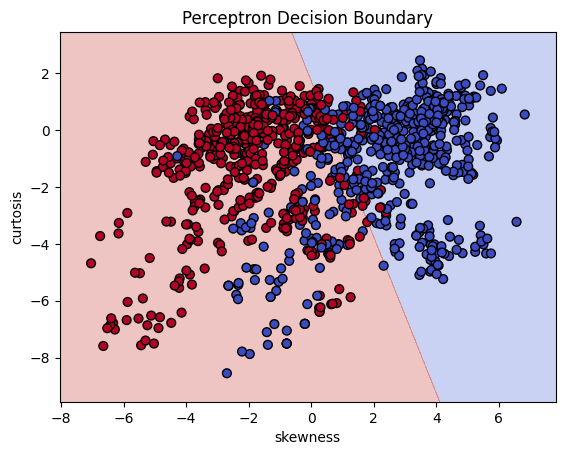

Selected Features: ['skewness', 'entropy']
Training Accuracy: 0.6153144940747494


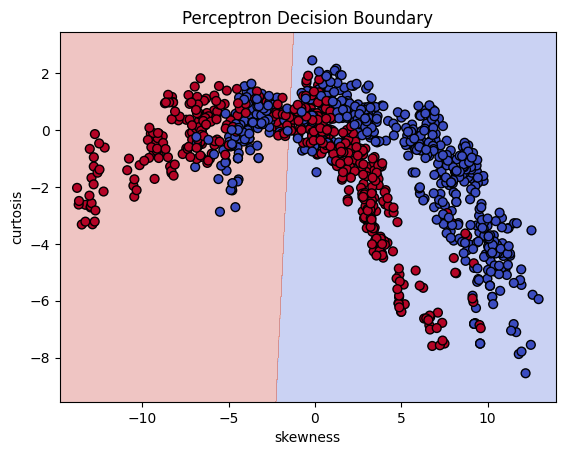

Selected Features: ['curtosis', 'entropy']
Training Accuracy: 0.495897903372835


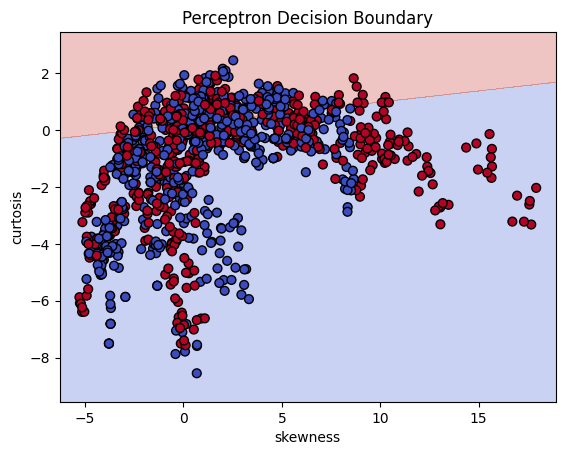

In [62]:
def experiment_with_features(X_data, y_data, feature_names):

    # Select specified features from the dataset
    selected_features = X_data[feature_names]

    # Split the dataset into training and testing sets
    X_train_selected, X_test_selected, y_train_selected, y_test_selected = train_test_split(
        selected_features, y_array, test_size=0.2, random_state=7
    )

    # Ensure data is in the correct format for the Perceptron
    X_train_selected = np.array(X_train_selected, dtype=float)
    y_train_selected = np.array(y_train_selected, dtype=int)

    # Initialize and train the Perceptron model
    perceptron_model = Perceptron(learning_rate=0.01, n_iter=1000)
    perceptron_model.fit(X_train_selected, y_train_selected)

    # Make predictions on the training data
    y_train_predicted = perceptron_model.predict(X_train_selected)
    training_accuracy = accuracy(y_train_selected, y_train_predicted)

    # Output results
    print("Selected Features:", selected_features.columns.tolist())
    print("Training Accuracy:", training_accuracy)


    # Visualize the decision boundary
    plot_decision_boundary(X_train_selected, y_train_selected, perceptron_model)

# Call the function with the selected feature pairs
experiment_with_features(X, y, ['variance', 'skewness'])
experiment_with_features(X, y, ['variance', 'curtosis'])
experiment_with_features(X, y, ['variance', 'entropy'])
experiment_with_features(X, y, ['skewness', 'entropy'])
experiment_with_features(X, y, ['curtosis', 'entropy'])




#### Bonus Step 4: Incrementally Add Data (+ 5 points)

1. Visualizing Incremental Learning: Another experiment to help understand the behavior of the Perceptron is to add data incrementally. Start with a small portion of
the dataset and progressively add more data points to train the Perceptron.

2. Observe how the decision boundary shifts: As you add more data, observe how the
hyperplane shifts and adapts to new points. This will help you understand how the
Perceptron continuously adjusts the boundary to separate the classes.

#### Step 5: Analyzing the Hyperplane (5 points)

After running the experiments, analyze the hyperplane’s behavior across different feature
sets and data inputs. Reflect on how the Perceptron algorithm adapts to the data and how
different feature combinations lead to different decision boundaries. Anwer the guiding
questions:
1. Why does the hyperplane change with different features or data points?

  The hyperplane changes with different features or data points because each feature set encapsulates different aspects of the data's underlying structure. When specific features are selected, they influence the direction and position of the hyperplane in the feature space. For instance, a feature that exhibits a strong correlation with the target class can lead to a more defined and effective separation between classes. Conversely, features that do not adequately distinguish between the classes may result in a hyperplane that poorly separates the data points. Additionally, variations in the data points themselves—such as their distribution or density—can also cause the hyperplane to adjust, reflecting the Perceptron's learning process as it iteratively updates its parameters based on the training data.
2. How does the decision boundary relate to the linearly separable nature of the data?

  The decision boundary represents the Perceptron's attempt to separate the classes based on the chosen features. In scenarios where the data is linearly separable, the decision boundary can be a straight line (or hyperplane) that effectively divides the classes without misclassification. However, if the data is not linearly separable, the decision boundary may exhibit more complex shapes or fail to provide clear separation, leading to misclassifications. This relationship highlights the importance of understanding the nature of the data: when features are appropriately chosen, and the data exhibits a linear relationship, the Perceptron can create a more accurate and effective decision boundary. Conversely, when the data is inherently non-linear, the Perceptron may struggle, necessitating the exploration of more advanced algorithms or feature transformations to achieve better classification performance.








#### Step 6: Fisher’s Linear Discriminant Projection (10 points)

In this step, you will implement Fisher’s Linear Discriminant (LD) to project the
dataset onto a 1D space and visualize the distribution of the two classes in the projected
space using a histogram. The goal of Fisher’s LD is to find the direction in the feature
space that maximizes the separation between two classes while minimizing the variance
within each class. This technique projects the data onto a single dimension where the
separation between the classes is optimized.

In [63]:
def fisher_ld_projection(X, y):
    # Separate data of two classes based on labels
    class_0 = X[y == 0]
    class_1 = X[y == 1]

    # Calculate the mean vectors for each classes
    mean_0 = np.mean(class_0, axis=0)
    mean_1 = np.mean(class_1, axis=0)


    # Compute the within-class scatter matrix
    S_within = np.cov(class_0, rowvar=False) * (len(class_0) - 1) + \
               np.cov(class_1, rowvar=False) * (len(class_1) - 1)

    # Calculate the projection direction using Fisher’s criterion
    w = np.dot(np.linalg.inv(S_within), mean_1 - mean_0)

    # Normalize the projection direction
    w /= np.linalg.norm(w)

    return w

def project_data(X, direction):
  # Project the data onto the Fisher direction
    return X.dot(direction)


# Flatten y_train_selected to ensure compatibility with matrix operations
y_train_selected = y_train_selected.ravel()

In [64]:
direction = fisher_ld_projection(X_train_selected, y_train_selected)

# Project the data to the Fisher LD direction
projected_data = project_data(X_train_selected, direction)


While not mandatory, it can be highly instructive to visualize the projection direction computed by Fisher’s LD in the original 2D feature space. This will help you understand how the data is being projected onto a 1D space and why this direction is optimal for class separation.

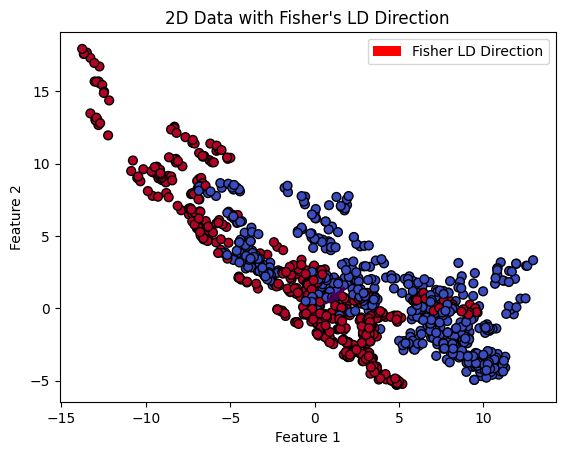

In [65]:
# Plot the 2D data with the projection direction

# Hint: You can use plt.scatter() to plot the 2D data with its features
# You can find the mean of the entire dataset for placing the direction vector
# Hint: You can use plt.quiver() method to visualize the direction vector
# Do not forget to scale the direction vector to visualize it properly
scale = 4 # Adjust this to control the length of the direction line
# Plot the data points, coloring by class labels
plt.scatter(X_train_selected[:, 0], X_train_selected[:, 1], c=y_train_selected, s=40, cmap=plt.cm.coolwarm, edgecolors='k')

# Calculate the mean of the selected features for plotting the starting point of the Fisher direction
mean_x = np.mean(X_train_selected, axis=0)

# Draw the Fisher Linear Discriminant direction as an arrow starting from the mean
plt.quiver(mean_x[0], mean_x[1], direction[0], direction[1], scale, color='red', label='Fisher LD Direction')

# Label the axes and add a title for clarity
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("2D Data with Fisher's LD Direction")

# Add a legend to label the Fisher direction arrow
plt.legend()

# Display the plot
plt.show()

Plot a histogram showing the distribution of the
projected data for each class in the 1D space. The histogram will help you visualize
how well the two classes are separated by the Fisher’s LD projection.

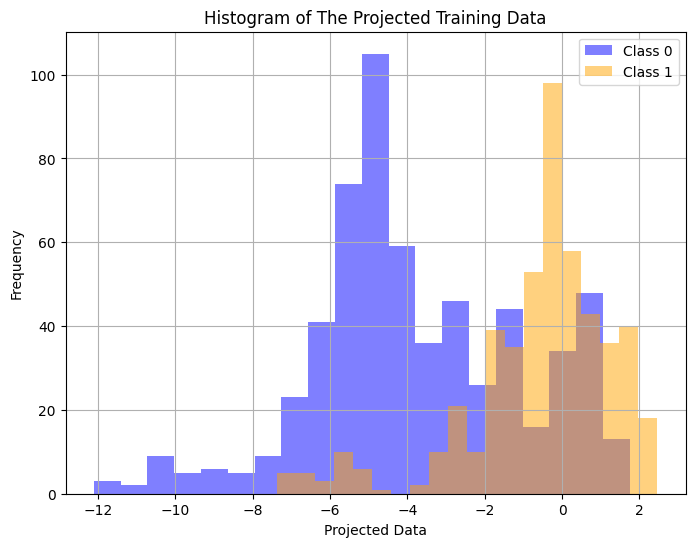

In [66]:
# Ensure that we are working with the training set for the histogram
# You should have already defined and split the training and test sets
# Use the training labels for projecting the training data

# Plot histogram of training data projected onto Fisher LD
plt.figure(figsize=(8, 6))
plt.hist(projected_data[y_train_selected == 0], bins=20, alpha=0.5, label='Class 0', color='blue')
plt.hist(projected_data[y_train_selected == 1], bins=20, alpha=0.5, label='Class 1', color='orange')
plt.xlabel('Projected Data')
plt.ylabel('Frequency')
plt.title('Histogram of The Projected Training Data')
plt.legend()
plt.grid()
plt.show()

Answer the guiding questions:
1. How well does Fisher’s LD separate the two classes in the 1D projected space?
  Fisher’s Linear Discriminant (LD) typically provides a good separation of the two classes in the 1D projected space. By maximizing the ratio of between-class variance to within-class variance, Fisher’s LD focuses on identifying the direction that best distinguishes the classes. As a result, the projected data points often display a clear separation, with classes appearing more distinct along the 1D axis. The effectiveness of the separation can be evaluated through the spread and overlap of the projected class distributions; ideally, the two classes should be well-separated, minimizing overlap and indicating effective discrimination.
2. Compare the separation of the two classes in the original 2D space (used in the
Perceptron) versus the 1D Fisher’s LD projection. What do you observe about the
class distributions in these spaces?
  In the original 2D space, the separation of the two classes may vary significantly depending on the feature combination used for the Perceptron. There could be instances where the classes overlap, making it challenging for the Perceptron to create a clear decision boundary. In contrast, the 1D Fisher’s LD projection often shows a more defined separation, as it is specifically designed to maximize class discrimination.

  When comparing class distributions, one may observe that the classes might cluster more tightly in the 1D space, with minimal overlap, whereas in the 2D space, they could exhibit varying degrees of overlap and intermingling. This suggests that while the Perceptron can be effective in certain feature combinations, Fisher's LD is particularly adept at providing a linear decision boundary that enhances class separation, highlighting the importance of dimensionality reduction techniques in improving classification performance.